In [1]:
import cv2
import os
import sys
import util
import tensorflow as tf
import numpy as np

data_path='/home/ye/user/yejg/database/eye_jpg/train/'
batch_size=1
IMG_W=1080
IMG_H=1080

There are 7983 health
There are 1992 sick
(1, 208, 208, 3) [1]


In [2]:
tra_image,tra_label,val_image,val_label=util.read_files(data_path)
val_images,val_labels=util.get_files('/home/ye/user/yejg/database/eye_jpg/train/health')

There are 7983 health
There are 1992 sick
There are 7983 images:


In [3]:
tra_image_batch,tra_label_batch=util.get_batch(tra_image,tra_label,IMG_W,IMG_H,batch_size,method='train')
val_image_batch,val_label_batch=util.get_batch(val_images,val_labels,IMG_W,IMG_H,batch_size)

(1080, 1080, 3)
(1080, 1080, 3)


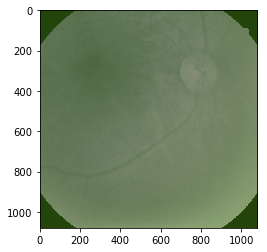

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
with tf.Session() as sess:
    coord=tf.train.Coordinator()
    threads=tf.train.start_queue_runners(sess=sess,coord=coord)
    try:
        
       i=0
       while not coord.should_stop() and i<2:
         #image=sess.run([tra_image_batch])[0]
         val=sess.run([val_image_batch])[0]
         #image=np.reshape(image,[IMG_H,IMG_W,3])
         val=np.reshape(val,[IMG_H,IMG_W,3])
         print(val.shape)
         plt.imshow(val)
         i+=1   
    except tf.errors.OutOfRangeError:
        print('done!')
    finally:
        coord.request_stop()
    coord.join(threads)

In [5]:
test=[os.path.join('/home/ye/user/yejg/database/eye_jpg/train/health/',f) for f in os.listdir('/home/ye/user/yejg/database/eye_jpg/train/health/')]

In [5]:
help(tf.image.adjust_saturation)

Help on function adjust_saturation in module tensorflow.python.ops.image_ops_impl:

adjust_saturation(image, saturation_factor, name=None)
    Adjust saturation of an RGB image.
    
    This is a convenience method that converts an RGB image to float
    representation, converts it to HSV, add an offset to the saturation channel,
    converts back to RGB and then back to the original data type. If several
    adjustments are chained it is advisable to minimize the number of redundant
    conversions.
    
    `image` is an RGB image.  The image saturation is adjusted by converting the
    image to HSV and multiplying the saturation (S) channel by
    `saturation_factor` and clipping. The image is then converted back to RGB.
    
    Args:
      image: RGB image or images. Size of the last dimension must be 3.
      saturation_factor: float. Factor to multiply the saturation by.
      name: A name for this operation (optional).
    
    Returns:
      Adjusted image(s), same shape and 